In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [31]:
img = cv2.imread("Frames/frame116.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5, 5), 0)

edges = cv2.Canny(blur, 50, 150)

# ROI
h, w = img.shape[:2]
roi = edges[int(h*0.4):int(h*0.7), int(w*0.3):int(w*0.7)]

# Find contours in the ROI
contours, _ = cv2.findContours(roi, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours back onto original image (shifted for ROI)
output = img.copy()
for cnt in contours:
    cnt[:,0,1] += int(h*0.4)  # shift contour y back
    cnt[:,0,0] += int(w*0.3)  # shift contour x back
    cv2.drawContours(output, [cnt], -1, (0, 0, 255), 2)



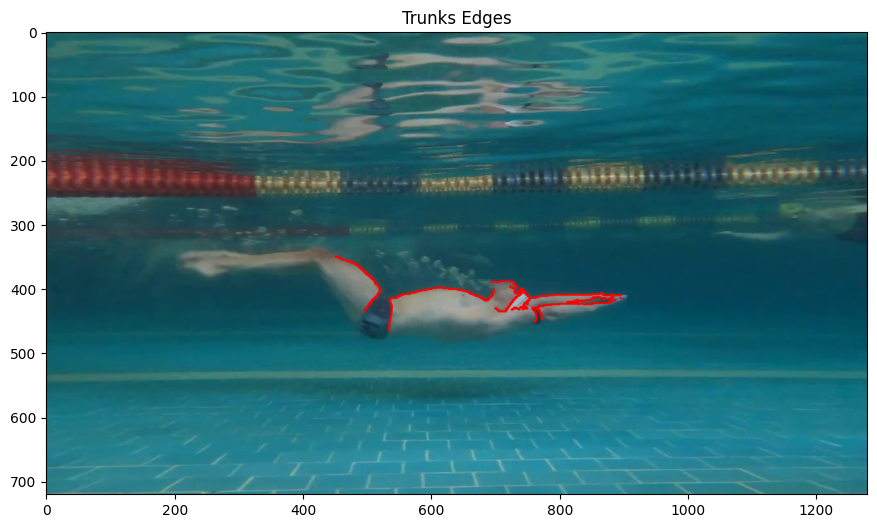

In [32]:
# # Display results
# plt.figure(figsize=(12,6))
# plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title("Original")
# plt.show()

# plt.figure(figsize=(12,6))
# plt.imshow(edges, cmap='gray'), plt.title("Edges (Canny)")
# plt.show()

plt.figure(figsize=(12,6))
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB)), plt.title("Trunks Edges")
plt.show()


In [33]:
# Hough Line Transform
lines = cv2.HoughLines(edges, 1, np.pi/180, 60)  # tune threshold=120

output = img.copy()

if lines is not None:
    for rho, theta in lines[:,0]:
        angle_deg = np.degrees(theta)
        
        # Keep only (near) vertical lines
        if angle_deg < 10 or angle_deg > 170:   # ~90 degrees ±10
            a, b = np.cos(theta), np.sin(theta)
            x0, y0 = a*rho, b*rho
            x1, y1 = int(x0 + 1000*(-b)), int(y0 + 1000*(a))
            x2, y2 = int(x0 - 1000*(-b)), int(y0 - 1000*(a))
            
            cv2.line(output, (x1,y1), (x2,y2), (0,0,255), 2)

# # Show results
# plt.figure(figsize=(12,6))
# plt.imshow(edges, cmap='gray'), plt.title("Edges")
# plt.show()

# plt.figure(figsize=(12,6))
# plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB)), plt.title("Vertical Lines Detected")
# plt.show()

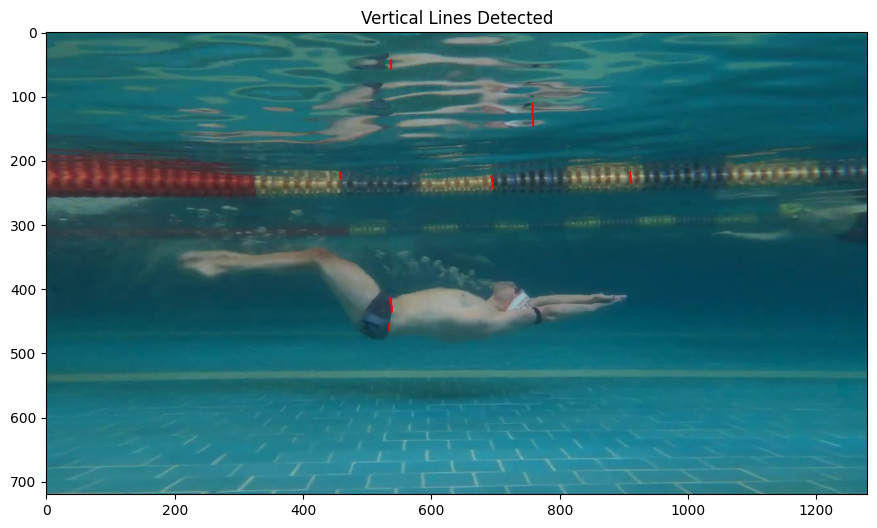

In [34]:
lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=10, minLineLength=10, maxLineGap=10)

output = img.copy()

if lines is not None:
    for x1, y1, x2, y2 in lines[:,0]:
        # Compute line angle
        angle = np.degrees(np.arctan2(y2 - y1, x2 - x1))
        
        # Keep near-vertical lines (angle ~ ±90°)
        if abs(angle) > 80:  
            cv2.line(output, (x1, y1), (x2, y2), (0,0,255), 2)

# Show results
# plt.figure(figsize=(12,6))
# plt.imshow(edges, cmap='gray'), plt.title("Edges")
# plt.show()

plt.figure(figsize=(12,6))
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB)), plt.title("Vertical Lines Detected")
plt.show()